PRIMEIRO IMPORTAMOS O PANDAS PARA CARREGAR OS DADOS

In [1]:
import pandas as pd


CARREGAMOS OS DADOS E TIRAMOS OS LIMITES DE EXIBIÇÃO DO PANDAS

In [2]:
entrada = 'Entrada/'
saida = 'Saida/'

df_bossa     = pd.read_csv(entrada + 'bossa_nova.csv')
df_funk      = pd.read_csv(entrada + 'funk.csv')
df_gospel    = pd.read_csv(entrada + 'gospel.csv')
df_sertanejo = pd.read_csv(entrada + 'sertanejo.csv')

pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

COM OS DADOS CARREGADOS NOS CRIAMOS UM CAMPO COM O GENERO DA MUSICA QUE SERA UTILIZADO MAIS PRA FRENTE PARA CLASSIFICARMOS OS DIFERENTES GENEROS

In [21]:
df_bossa['genero'    ] = 'bossa'
df_funk['genero'     ] = 'funk'
df_gospel['genero'   ] = 'gospel'
df_sertanejo['genero'] = 'sertanejo'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


CARREGAMOS A LISTA DE STOPWORDS PORTUGUESAS PARA UTILIZAR COMO FILTRO NO NOSSO CORPUS

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

list_stops_words = stopwords.words('portuguese')

corpus_bossa     = [word for i in df_bossa['lyric'].str.split().values.tolist() for word in i if (word not in list_stops_words)]
corpus_funk      = [word for i in df_funk['lyric'].str.split().values.tolist() for word in i if (word not in list_stops_words)]
corpus_gospel    = [word for i in df_gospel['lyric'].str.split().values.tolist() for word in i if (word not in list_stops_words)]
corpus_sertanejo = [word for i in df_sertanejo['lyric'].str.split().values.tolist() for word in i if (word not in list_stops_words)]

GERAMOS UMA LISTA COM AS 10 PALAVRAS MAIS COMUNS EM CADA GENERO

In [ ]:
from nltk.probability import FreqDist
comuns_bossa = FreqDist(corpus_bossa).most_common(10)
comuns_funk = FreqDist(corpus_funk).most_common(10)
comuns_gospel = FreqDist(corpus_gospel).most_common(10)
comuns_sertanejo = FreqDist(corpus_sertanejo).most_common(10)

INICIAMOS O PLOT DAS PALAVRAS QUE MAIS APARECEM EM CADA GENERO

BOSSA

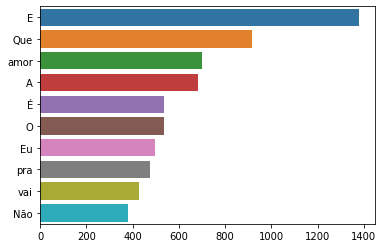

In [30]:
import seaborn as sns

words, frequency = [], []
for word, count in comuns_bossa:
    words.append(word)
    frequency.append(count)
    
sns.barplot(x = frequency, y = words)

FUNK

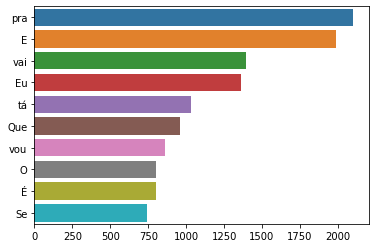

In [31]:
import seaborn as sns

words, frequency = [], []
for word, count in comuns_funk:
    words.append(word)
    frequency.append(count)
    
sns.barplot(x = frequency, y = words)

GOSPEL

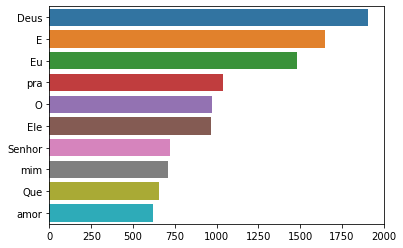

In [29]:
import seaborn as sns

words, frequency = [], []
for word, count in comuns_gospel:
    words.append(word)
    frequency.append(count)
    
sns.barplot(x = frequency, y = words)

SERTANEJO

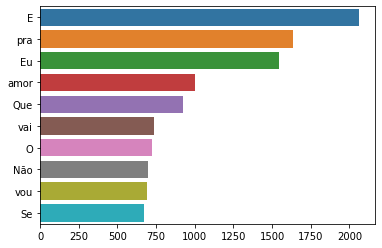

In [28]:
import seaborn as sns

words, frequency = [], []
for word, count in comuns_sertanejo:
    words.append(word)
    frequency.append(count)
    
sns.barplot(x = frequency, y = words)

APOS ANALISAR CADA GENERO CRIAMOS UM DATASET COM TODAS AS LETRAS DOS DATASETS

In [4]:
df_generos = pd.concat([df_bossa, df_funk, df_gospel, df_sertanejo])

df_generos['genero'].value_counts()

df_generos.head(10)

,lyric,genero
0,"\nEu sei que vou te amar\nPor toda a minha vida eu vou te amar\nEm cada despedida eu vou te amar\nDesesperadamente, eu sei que vou te amar\nE cada verso meu será\nPra te dizer que eu sei que vou te amar\nPor toda minha vida\nEu sei que vou chorar\nA cada ausência tua eu vou chorar\nMas cada volta tua há de apagar\nO que esta ausência tua me causou\nEu sei que vou sofrer a eterna desventura de viver\nA espera de viver ao lado teu\nPor toda a minha vida",bossa


VERIFICAMOS QUE O ENTER FOI ATRIBUIDO COMO \n NO DATASET ENTÃO TRATAMOS ISSO, ALEM DE PADRONIZAR TODOS OS CARACTERES PASSANDO ELES PARA LOWERCASE

In [7]:
df_generos['lyric'] = df_generos['lyric'].str.lower()

df_generos['lyric'].replace('\n',' ', regex=True, inplace=True)

print(df_generos['lyric'].values[0])

  eu sei que vou te amar por toda a minha vida eu vou te amar em cada despedida eu vou te amar desesperadamente, eu sei que vou te amar e cada verso meu será pra te dizer que eu sei que vou te amar por toda minha vida eu sei que vou chorar a cada ausência tua eu vou chorar mas cada volta tua há de apagar o que esta ausência tua me causou eu sei que vou sofrer a eterna desventura de viver a espera de viver ao lado teu por toda a minha vida 


APOS TRATAR OS REGISTROS GERAMOS UM HISTOGRAMA DOS GENEROS
ESSE HISTOGRAMA AUXILIA A ENCONTRAR POSSIVEIS GENEROS QUE NAO POSSUAM TANTA AFINIDADE ENTRE-SI

In [16]:
import plotly.graph_objects as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

x1 = df_generos.loc[df_generos['genero'] == "bossa",'lyric']

x2 = df_generos.loc[df_generos['genero'] == "funk",'lyric']

x3 = df_generos.loc[df_generos['genero'] == "gospel",'lyric']

x4 = df_generos.loc[df_generos['genero'] == "sertanejo",'lyric']


trace1 = go.Histogram(x=x1, name = 'bossa',opacity=0.75)
    
trace2 = go.Histogram(x=x2, name = 'funk',opacity=0.75)
    
trace3 = go.Histogram(x=x3, name = 'gospel',opacity=0.75)

trace4 = go.Histogram(x=x4, name = 'sertanejo',opacity=0.75)

data = [trace1,trace2,trace3,trace4]
layout = go.Layout(barmode='overlay', title='Análise de Distribuição por Genero')
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='overlaid histogram')

PODEMOS VER COM BASE NO HISTOGRAMA QUE O GENERO QUE POSSUI MENOR AFINIDADE ENTRE ELES É O SERTANEJO.. ISSO DEMONSTRA UMA POSSIVEL DIFICULDADE DO MODELO DE POSSUIR UMA BOA ACURACIA COM ESSE GENERO

NA HORA DE MODELAR SEPARAMOS NOSSOS DATASETS EM 70 TREINO E 30 TEST.

UTLIZAMOS COUNTVECTORIZER PARA GERAR OS TOKENS, TFIDTRANSFORMER PARA NORMALIZAR OS DADOS E MULTINOMIAL NAIVE BAYES PARA CLASSIFICAR NOSSO PROBLEMA UTILIZANDO PADRÕES NA CONTAGEM DE PALAVRAS

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_generos['lyric'], df_generos["genero"],
                                                    test_size=0.30,
                                                    random_state=4)

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

classify = Pipeline(
                [('vect', CountVectorizer(stop_words= list_stops_words)),
                 ('tfidf', TfidfTransformer()),
                 ('clf', MultinomialNB(fit_prior=False, alpha=.01)),
                 ])

classify.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(stop_words=['a', 'à', 'ao', 'aos', 'aquela',
                                             'aquelas', 'aquele', 'aqueles',
                                             'aquilo', 'as', 'às', 'até', 'com',
                                             'como', 'da', 'das', 'de', 'dela',
                                             'delas', 'dele', 'deles', 'depois',
                                             'do', 'dos', 'e', 'é', 'ela',
                                             'elas', 'ele', 'eles', ...])),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(alpha=0.01, fit_prior=False))])

APOS RODAR O MODELO, RETIRO AS SEGUINTES METRICAS UTILIZANDO CROSS VALIDATION 

ACURACIA = % GERAL DE CLASSIFICAÇÕES CORRETAS DO MODELO

PRECISAO = QUANTOS % DAS PREDIÇÕES POSITIVAS SÃO REALMENTE POSITIVAS?

RECALL/SENSIBILIDADE   = QUANTOS % FORAM ACERTADOS DENTRO DO GENERO 

F1 SCORE = MEDIA HARMONICA ENTRE PRECISAO E RECALL

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

scores = cross_val_score(classify, X_test, y_test, cv=5, scoring='f1_macro')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

preds = classify.predict(X_test)
print(metrics.classification_report(y_test, preds))

Accuracy: 0.81 (+/- 0.04)
              precision    recall  f1-score   support

       bossa       0.91      0.72      0.81       261
        funk       0.90      0.86      0.88       237
      gospel       0.91      0.93      0.92       244
   sertanejo       0.68      0.86      0.76       218

    accuracy                           0.84       960
   macro avg       0.85      0.84      0.84       960
weighted avg       0.85      0.84      0.84       960



NO FINAL PODEMOS VER QUE O MODELO TEVE UMA BAIXA PRECISÃO COM O GENERO SERTANEJO COMO PREVISTO

POREM, HOUVE UMA BAIXA SENSIBILIDADE EM BOSSA O QUE DEMONSTRA QUE DENTRE TODOS OS GENEROS BOSSA FOI A QUE MAIS HOUVE ERROS DE PREDIÇÃO

PEGAMOS UM TRECHO DA MUSICA SERTANEJA NOTIFICAÇÃO PREFERIDA E VERIFICAMOS SE O MODELO PREDIZ CORRETAMENTE O GENERO

In [10]:
texto  = "Já doeu Mas hoje não dói mais Tanto fiz Que agora tanto faz  O nosso amor calejou Apanhou, " \
         "apanhou que cansou Na minha cama cê fez tanta falta Que o meu coração te expulsou  Não tem mais " \
         "eu e você Tá facin de entender Você me deu aula de como aprender te esquecer  Foi, mas não é mais " \
         "a minha notificação preferida Já foi, mas não é mais a número um da minha vida Sinto em te dizer Mas " \
         "eu já superei você  O nosso amor calejou Apanhou, apanhou que cansou Na minha cama cê fez tanta falta " \
         "Que o meu coração te expulsou  Não tem mais eu e você Tá facin de entender Você me deu aula de como aprender " \
         "te esquecer  Foi, mas não é mais a minha notificação preferida Já foi, mas não é mais a número um da minha " \
         "vida Sinto em te dizer Mas eu já superei você  Foi, mas não é mais a minha notificação preferida Já foi, mas " \
         "não é mais a número um da minha vida Sinto em te dizer Mas eu já superei você  Já doeu Mas hoje não dói mais"

classify.predict([texto])

array(['sertanejo'], dtype='<U9')

VEMOS QUE O MODELO PREDISSE CORRETAMENTE O GENERO

ENTÃO POR FIM IMPORTAMOS O ARQUIVO PKL PARA QUE O MODELO SEJA UTILIZADO EM UMA API

In [ ]:
import joblib


filename = saida + 'classificator.pkl'
joblib.dump(classify, filename)